In [1]:
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

from pykern.pkcollections import PKDict
# The rslaser library may not be installed, so a check is required.
try:
    import rslaser
except:
    print("The rslaser library was not found; installing from GitHub...")
    # Developers should use 'pip install -e .' from the command line.
    # Users can install directly from GitHub --
    !{sys.executable} -m pip install git+https://github.com/radiasoft/rslaser.git
    import rslaser
from rslaser.optics import wavefront
from rslaser.pulse import pulse

import scipy
import scipy.constants as const

# SRW and srwlib (the corresponding Python API) are pre-installed on Sirepo/Jupyter
import srwlib
from srwlib import srwl

In [2]:
# specify all default values of system parameters in a Pykern dictionary object

# photon energy corresponding to lambda = 1 micron
_LASER_PULSE_SLICE_DEFAULTS = PKDict(
    sigrW=0.000186,
    propLen=15,
    pulseE=0.001,
    poltype=1,
    sampFact=5,
    numsig=3.,
    mx=0,
    my=0
)
_LASER_PULSE_DEFAULTS = PKDict(
        phE=1.55,
        nslice=1,
        chirp=0,
        w0=.1,
        a0=.01,
        dw0x=0.0,
        dw0y=0.0,
        z_waist=0.,
        dzwx=0.0,
        dzwy=0.0,
        tau_fwhm=0.1 / const.c / math.sqrt(2.),
        z_center=0.,
        x_shift = 0.,
        y_shift=0.,
        d_to_w=0.002,
        slice_params=_LASER_PULSE_SLICE_DEFAULTS,
)

In [3]:
# the laser pulse parameters are loaded into a Pykern dictionary object
# the slice parameters are included hierarchically
in_pulse = PKDict(
    **_LASER_PULSE_DEFAULTS
    )

# Specify non-default values for laser pulse parameters at center of crystal
in_pulse.w0 = 400.e-6         # waist size [m]   

In [4]:
# instantiate the laser pulse (this can take a few seconds)
LP = pulse.LaserPulse(in_pulse)

In [5]:
# choose one of the laser pulse slices, and grab its SRW wavefront object
slice=LP.slice
wfr0=slice[0].wfr
print('np.size(wfr0.arEx) = ', np.size(wfr0.arEx))
print('np.shape(wfr0.arEx) = ', np.shape(wfr0.arEx))
print('np.max(wfr0.arEx) = ', np.max(wfr0.arEx))
print('np.max(wfr0.arEy) = ', np.max(wfr0.arEy))

print(' ')
print(' wfr0.mesh.nx = ', wfr0.mesh.nx)
print(' wfr0.mesh.ny = ', wfr0.mesh.ny)
192**2 * 2

np.size(wfr0.arEx) =  73728
np.shape(wfr0.arEx) =  (73728,)
np.max(wfr0.arEx) =  1915636.5
np.max(wfr0.arEy) =  0.0
 
 wfr0.mesh.nx =  192
 wfr0.mesh.ny =  192


73728

Size of initial wavefront data array (coordinate): (192, 192)


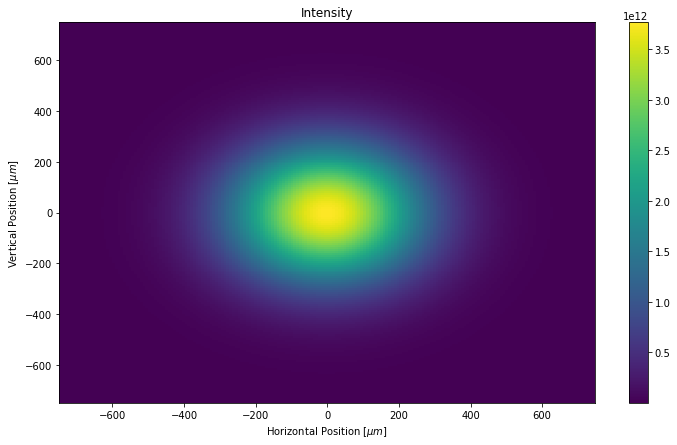

In [6]:
#Plot initial wavefront
##Initial wfr calculation
arIinit = srwlib.array('f', [0]*wfr0.mesh.nx*wfr0.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfr0, 6, 0, 3, wfr0.mesh.eStart, 0, 0) #extracts intensity

##Reshaping electric field data from flat to 2D array
arIinit2D = np.array(arIinit).reshape((wfr0.mesh.nx, wfr0.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvalsf02=np.linspace(wfr0.mesh.xStart,wfr0.mesh.xFin,wfr0.mesh.nx)
yvalsf02=np.linspace(wfr0.mesh.yStart,wfr0.mesh.yFin,wfr0.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

# By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), arIinit2D, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()
#['Horizontal Position [mm]', , 'Intensity']
# ax.set_ylim(-1e4,1e4)
# ax.set_xlim(-1e4,1e4)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Intensity')
plt.show()

In [7]:
print('wfr0.mesh.xStart = ', wfr0.mesh.xStart)
print('wfr0.mesh.eStart = ', wfr0.mesh.eStart)
print('wfr0.mesh.eFin = ', wfr0.mesh.eFin)
print('wfr0.mesh.ne = ', wfr0.mesh.ne)

help(wfr0)

wfr0.mesh.xStart =  -0.0007440050373154675
wfr0.mesh.eStart =  1.55
wfr0.mesh.eFin =  1.55
wfr0.mesh.ne =  1
Help on SRWLWfr in module srwlib object:

class SRWLWfr(builtins.object)
 |  SRWLWfr(_arEx=None, _arEy=None, _typeE='f', _eStart=0, _eFin=0, _ne=0, _xStart=0, _xFin=0, _nx=0, _yStart=0, _yFin=0, _ny=0, _zStart=0, _partBeam=None)
 |  
 |  Radiation Wavefront (Electric Field)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, _arEx=None, _arEy=None, _typeE='f', _eStart=0, _eFin=0, _ne=0, _xStart=0, _xFin=0, _nx=0, _yStart=0, _yFin=0, _ny=0, _zStart=0, _partBeam=None)
 |      :param _arEx: horizontal complex electric field component array; NOTE: only 'f' (float) is supported for the moment (Jan. 2011)
 |      :param _arEy: vertical complex electric field component array
 |      :param _typeE: electric field numerical type: 'f' (float) or 'd' (double)
 |      :param _eStart: initial value of photon energy (/time)
 |      :param _eFin: final value of photon energy (/time)
 |     

In [8]:
wfr3 = srwlib.SRWLWfr(_arEx=wfr0.arEy, _arEy=wfr0.arEx, _typeE='f', 
                      _eStart=wfr0.mesh.eStart, _eFin=wfr0.mesh.eFin, _ne=wfr0.mesh.ne, 
                      _xStart=wfr0.mesh.xStart, _xFin=wfr0.mesh.xFin, _nx=wfr0.mesh.nx, 
                      _yStart=wfr0.mesh.yStart, _yFin=wfr0.mesh.yFin, _ny=wfr0.mesh.ny, 
                      _zStart=0., _partBeam=None)
# print('wfr3.arEy = ', wfr3.arEy)

Size of initial wavefront data array (coordinate): (192, 192)


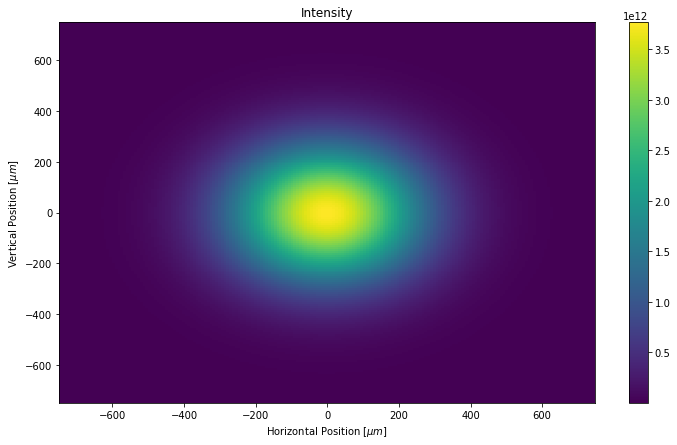

In [9]:
# plot intensity of the hand-built wavefront
intensity = srwlib.array('f', [0]*wfr3.mesh.nx*wfr3.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity, wfr3, 6, 0, 3, wfr3.mesh.eStart, 0, 0) #extracts intensity

##Reshaping electric field data from flat to 2D array
intens_2d = np.array(intensity).reshape((wfr3.mesh.nx, wfr3.mesh.ny), order='C')
wfrsizei=np.size(intensity)

print('Size of initial wavefront data array (coordinate):',np.shape(intens_2d))
x3 = np.linspace(wfr3.mesh.xStart, wfr3.mesh.xFin, wfr3.mesh.nx)
y3 = np.linspace(wfr3.mesh.yStart, wfr3.mesh.yFin, wfr3.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(x3,1e6), np.multiply(y3,1e6), intens_2d, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()

ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Intensity')
plt.show()

In [10]:
wfr4 = srwlib.SRWLWfr(_arEx=wfr0.arEy, _arEy=wfr0.arEx, _typeE='f', 
                      _eStart=wfr0.mesh.eStart, _eFin=wfr0.mesh.eFin, _ne=wfr0.mesh.ne, 
                      _xStart=-400e-6, _xFin=400e-6, _nx=wfr0.mesh.nx, 
                      _yStart=0., _yFin=1.e-3, _ny=wfr0.mesh.ny, 
                      _zStart=0., _partBeam=None)
# print('wfr4.arEy = ', wfr4.arEy)

Size of initial wavefront data array (coordinate): (192, 192)


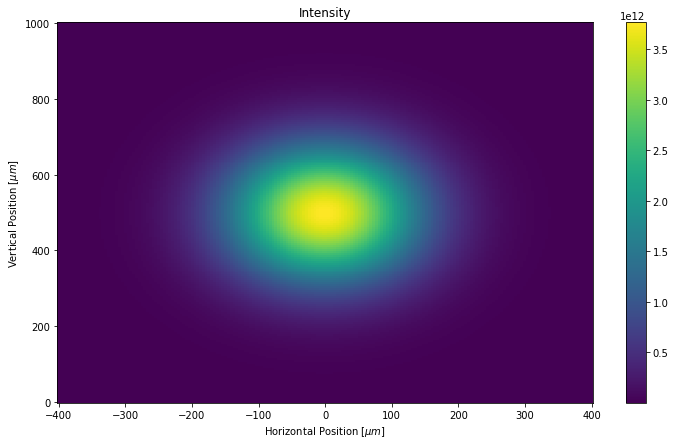

In [11]:
# plot intensity of the hand-built wavefront
intensity = srwlib.array('f', [0]*wfr4.mesh.nx*wfr4.mesh.ny) # "flat" array to take 2D intensity data
srwl.CalcIntFromElecField(intensity, wfr4, 6, 0, 3, wfr4.mesh.eStart, 0, 0) #extracts intensity

##Reshaping electric field data from flat to 2D array
intens_2d_4 = np.array(intensity).reshape((wfr4.mesh.nx, wfr4.mesh.ny), order='C')
wfrsizei=np.size(intensity)

print('Size of initial wavefront data array (coordinate):',np.shape(intens_2d))
x4 = np.linspace(wfr4.mesh.xStart, wfr4.mesh.xFin, wfr4.mesh.nx)
y4 = np.linspace(wfr4.mesh.yStart, wfr4.mesh.yFin, wfr4.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(x4,1e6), np.multiply(y4,1e6), intens_2d_4, cmap=plt.cm.viridis,shading='auto')
plt.colorbar()

ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Intensity')
plt.show()